# Librerías

In [1]:
import pandas as pd
import shutil
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from moviepy.editor import VideoFileClip

In [2]:
# Ruta del archivo CSV
csv_path = './data/feature-vectors-csv/bloque01/s3d/output.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_path)

# Contar el número de filas
num_rows = len(df)

print(f'El número de filas en el archivo CSV es: {num_rows}')

El número de filas en el archivo CSV es: 2708


# Moviendo los videos del SubSet

In [6]:
def copy_videos(csv_path, source_folder, destination_folder, start_index=0, end_index=5432):
    df = pd.read_csv(csv_path)
    
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    video_ids = df['youtube_id'].iloc[start_index:end_index]
    
    all_files = os.listdir(source_folder)

    for video_id in video_ids:
        pattern = re.compile(re.escape(video_id) + r'_.*\.mp4$')
        for file in all_files:
            if pattern.match(file):
                source_path = os.path.join(source_folder, file)
                destination_path = os.path.join(destination_folder, file)
                shutil.copy(source_path, destination_path)
                print(f"Copied: {file}")
                break
        else:
            print(f"File not found for ID: {video_id}")

csv_path = './data/train_subset_10.csv'  # Ruta al archivo CSV
source_folder = './data/train_subset'  # Ruta a la carpeta de origen de los videos
destination_folder = './data/train_subset_10'  # Ruta a la carpeta destino donde copiar los videos

copy_videos(csv_path, source_folder, destination_folder)

Copied: zeIkGEHK46I_000088_000098.mp4
Copied: -Fwy8NwefTk_000010_000020.mp4
Copied: sDD0p8h88rI_000000_000010.mp4
Copied: 09AinCnKAE8_000010_000020.mp4
Copied: qyTDZajMSqQ_000069_000079.mp4
Copied: nGx0rZBQa84_000257_000267.mp4
Copied: QpBihhfoqiA_000023_000033.mp4
Copied: vDrA6LEFvUQ_000000_000010.mp4
Copied: jNZq06PrwTM_000073_000083.mp4
Copied: C4Sv9AIOzCI_000506_000516.mp4
Copied: YgYJGayETlI_000028_000038.mp4
Copied: LKzoGC1npcw_000828_000838.mp4
Copied: BLHhmBU-Tts_000020_000030.mp4
Copied: 8vmr4mHxmks_000011_000021.mp4
Copied: 8fSF6jCy7Qk_000033_000043.mp4
Copied: QF0u6V3l5HI_000000_000010.mp4
Copied: S7UXJIM8QpU_000013_000023.mp4
Copied: xpx6ccaYIE4_000431_000441.mp4
Copied: OiwxcoT2Xog_000453_000463.mp4
Copied: gCtibUWTcYo_000001_000011.mp4
Copied: Csj1UUFQ30I_000002_000012.mp4
Copied: ozUoLCvr4-w_000001_000011.mp4
Copied: DfbmfYSk1QA_000011_000021.mp4
Copied: 2rlWNAR4i20_000169_000179.mp4
Copied: cTEhz26JRyU_000001_000011.mp4
Copied: nNLSyQKs4Zg_000005_000015.mp4
Copied: jWw5

# Analizando Frecuencia de etiquetas

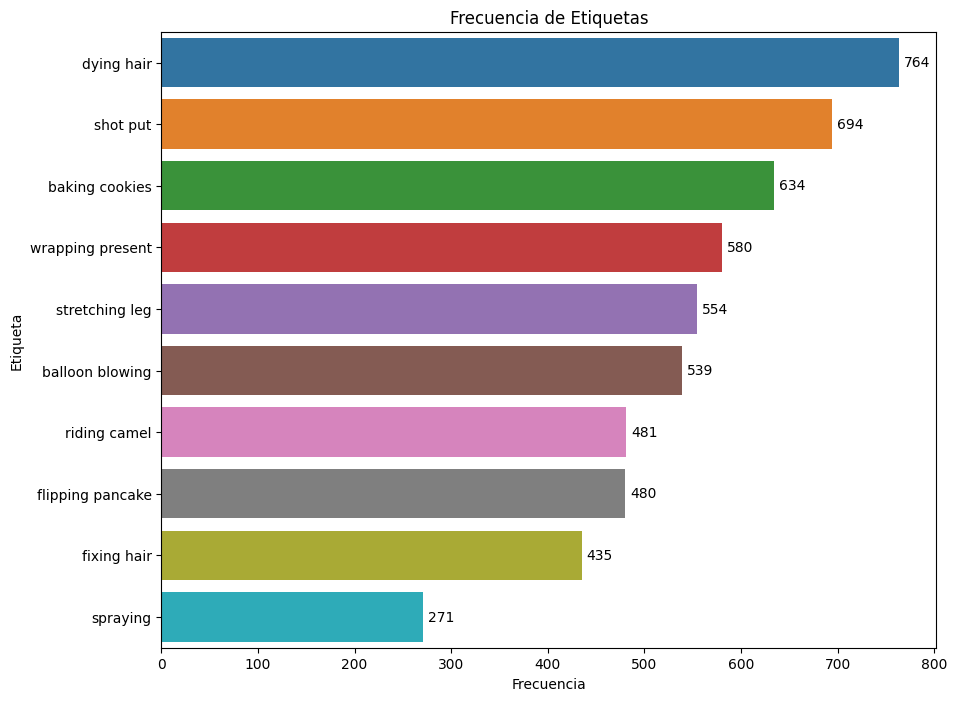

In [26]:
df = pd.read_csv('./data/train_subset_10.csv')

label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Frequency']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Frequency', y='Label', hue='Label', data=label_counts, palette=colors)

for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2,
             int(width),
             va='center')

plt.title('Frecuencia de Etiquetas')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

In [ ]:

# Ruta a la carpeta que contiene los archivos MP4
directorio = './data/train_subset_10'

# Lista para guardar las duraciones
duracion_videos = []
nombres_videos = []

# Recorrer los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith(".mp4"):
        ruta_completa = os.path.join(directorio, archivo)
        try:
            # Intentar cargar el video y obtener su duración
            with VideoFileClip(ruta_completa) as clip:
                duracion_videos.append(clip.duration)
                nombres_videos.append(archivo)
        except Exception as e:
            # Imprimir un mensaje de error para el archivo problemático y continuar
            print(f"No se pudo procesar el archivo {archivo}: {e}")

In [ ]:
# Crear un DataFrame a partir de los datos
df_videos = pd.DataFrame({
    'Duracion': duracion_videos
})

# Ordenar los videos por duración
df_videos_sorted = df_videos.sort_values(by='Duracion', ascending=True)
df_videos_sorted.reset_index(drop=True, inplace=True)



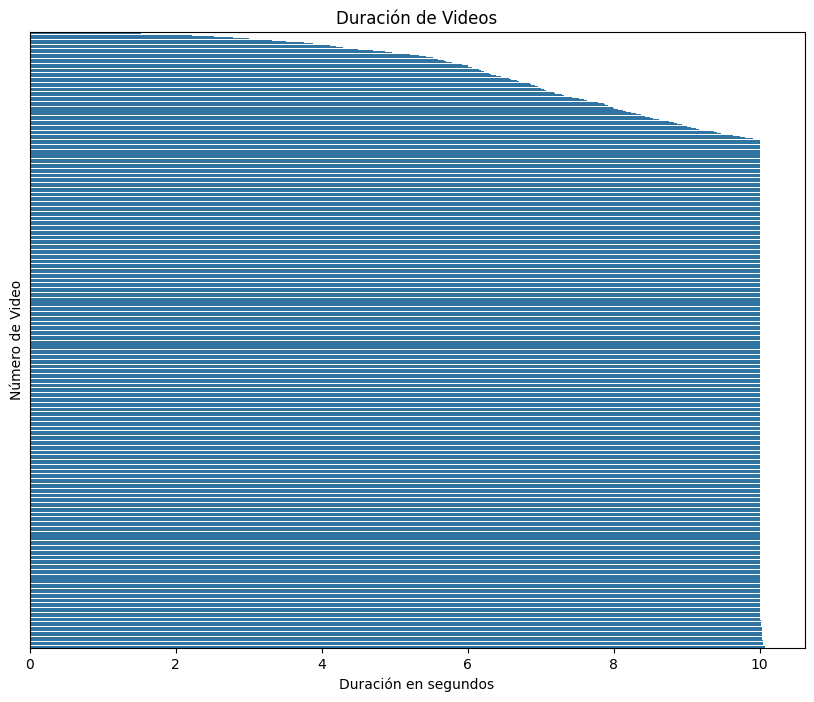

In [51]:
# Agregar una columna de 'Número' que sirve como etiqueta secuencial para cada video
df_videos_sorted['Número'] = df_videos_sorted.index + 1

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Duracion', y='Número', data=df_videos_sorted, orient='h')


plt.title('Duración de Videos')
plt.xlabel('Duración en segundos')
plt.yticks([]) 
plt.ylabel('Número de Video')
plt.show()

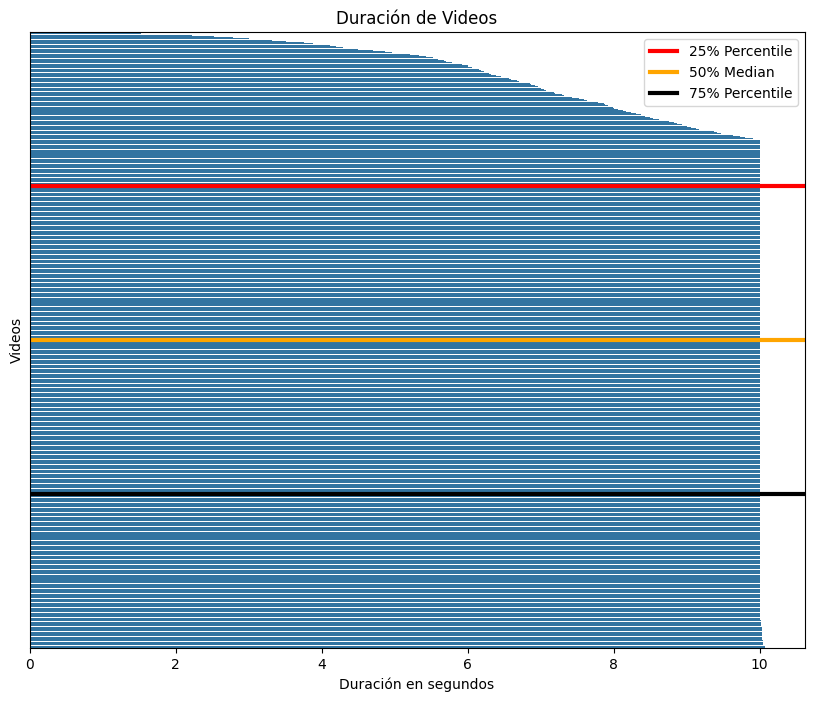

In [55]:
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Duracion', y='Número', data=df_videos_sorted, orient='h')

num_videos = len(df_videos_sorted)
p25 = num_videos * 0.25
p50 = num_videos * 0.50
p75 = num_videos * 0.75

plt.axhline(y=p25, color='red', linestyle='-', label='25% Percentile', linewidth=3)
plt.axhline(y=p50, color='orange', linestyle='-', label='50% Median', linewidth=3)
plt.axhline(y=p75, color='black', linestyle='-', label='75% Percentile', linewidth=3)

plt.title('Duración de Videos')
plt.xlabel('Duración en segundos')
plt.ylabel('Videos')
plt.yticks([])  
plt.legend()
plt.show()